In [1]:
#%%
%load_ext autoreload
%autoreload 2

import os 
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from src.technical_indicators import Indications, Technical_Calculations
from src.custom_indicators import CustomIndicators

### Pull Rifinitiv data

In [ ]:
rd.close_session()

In [ ]:
import refinitiv.data as rd


start="2021-01-01"
end="2023-12-31"
ticker = "AAPL"

try:
    rd.open_session(config_name='./refinitiv-data.config.json').open()
except:
    rd.open_session(config_name='/Users/darien/Configs/refinitiv-data.config.json').open()


s1_rd_raw = rd.content.historical_pricing.summaries.Definition(ticker+'.O', start=start, end=end).get_data()
s1_rd = s1_rd_raw.data.df

s1_rd



AAPL.O,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE
Date,,,,,,,,,,,,,,,
2021-01-04,129.41,133.6116,126.76,143301887,133.52,129.4,129.41,18590920609.960945,129.6944,175,25021731,1310221,1,75600,<NA>
2021-01-05,131.01,131.74,128.43,97664898,128.89,130.95,130.96,12766554556.37639,130.7353,120,16268457,707577,1,75600,<NA>
2021-01-06,126.6,131.0499,126.382,155087970,127.72,126.58,126.68,19905574086.05994,128.3811,189,17765110,1202574,1,76500,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,193.15,193.5,191.09,48087681,192.49,193.18,193.2,9260141930.0,192.5342,95,12817004,548076,1,76500,<NA>
2023-12-28,193.58,194.66,193.17,34049898,194.14,193.57,193.58,6603031144.0,193.9365,56,6555763,472404,1,75600,<NA>
2023-12-29,192.53,194.4,191.725,42672148,193.9,192.49,192.54,8217635465.0,192.572,67,11879095,509123,1,75600,<NA>


### Rename columns to OHLC standard

In [ ]:
s1_rd = s1_rd.rename(columns={
    'TRDPRC_1': 'Close',
    'HIGH_1': 'High',
    'LOW_1': 'Low',
    'ACVOL_UNS': 'Volume',
    'OPEN_PRC': 'Open'
})

s1_rd = s1_rd.astype(float)

s1_rd

AAPL.O,Close,High,Low,Volume,Open,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE
Date,,,,,,,,,,,,,,,
2021-01-04,129.41,133.6116,126.760,143301887.0,133.52,129.40,129.41,1.859092e+10,129.6944,175.0,25021731.0,1310221.0,1.0,75600.0,NaN
2021-01-05,131.01,131.7400,128.430,97664898.0,128.89,130.95,130.96,1.276655e+10,130.7353,120.0,16268457.0,707577.0,1.0,75600.0,NaN
2021-01-06,126.60,131.0499,126.382,155087970.0,127.72,126.58,126.68,1.990557e+10,128.3811,189.0,17765110.0,1202574.0,1.0,76500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,193.15,193.5000,191.090,48087681.0,192.49,193.18,193.20,9.260142e+09,192.5342,95.0,12817004.0,548076.0,1.0,76500.0,NaN
2023-12-28,193.58,194.6600,193.170,34049898.0,194.14,193.57,193.58,6.603031e+09,193.9365,56.0,6555763.0,472404.0,1.0,75600.0,NaN
2023-12-29,192.53,194.4000,191.725,42672148.0,193.90,192.49,192.54,8.217635e+09,192.5720,67.0,11879095.0,509123.0,1.0,75600.0,NaN


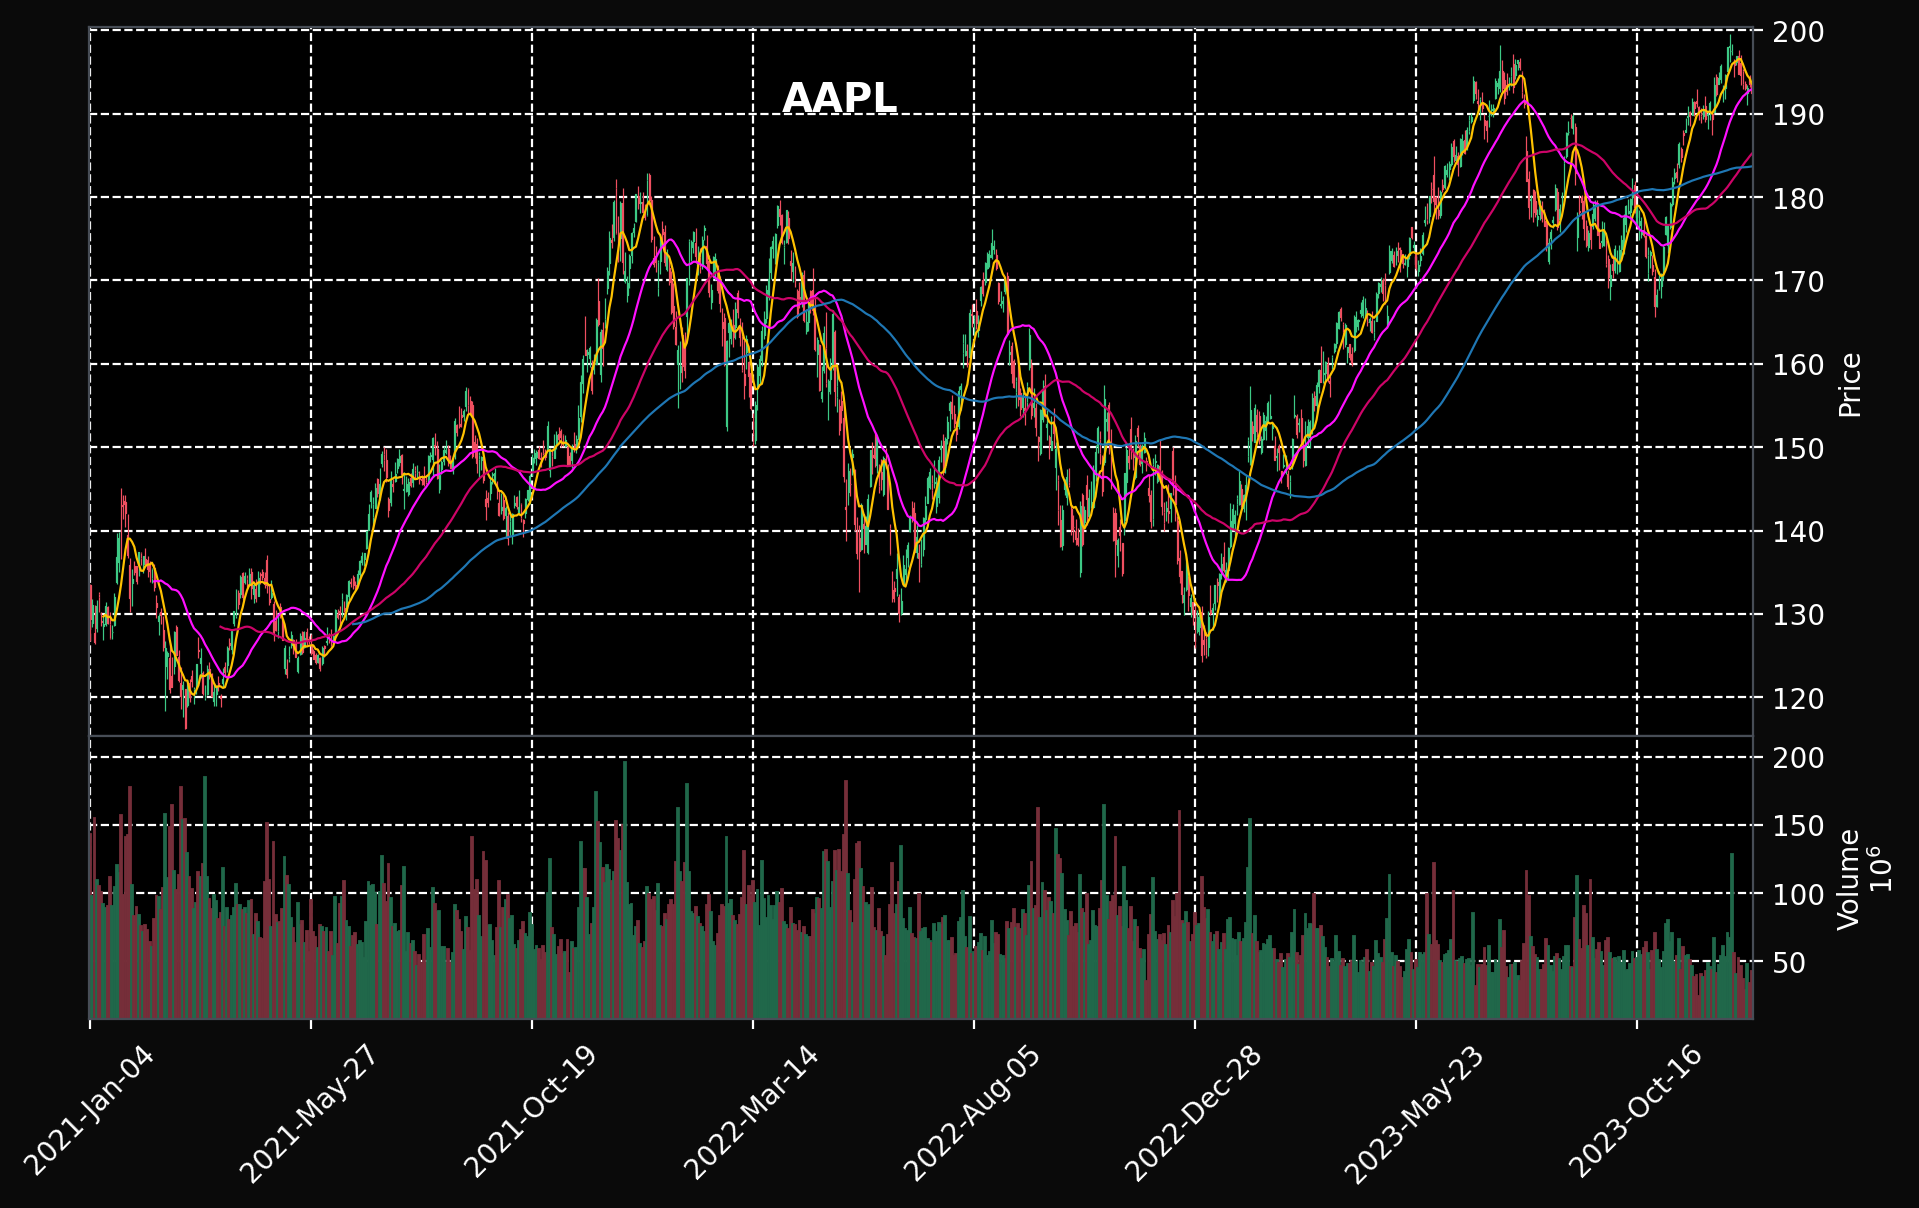

In [ ]:
import mplfinance as mpf
mpf

mpf.plot(s1_rd, 
         style='binancedark', 
         type='candle',
         mav=(7, 30, 60, 120),
            volume=True,
            ylabel='Price',
            ylabel_lower='Volume',
            figratio=(10,6),
            title=ticker,
            tight_layout=True,
)

In [15]:

exchange = 'Refinitiv'
equity = 'AAPL'
market = 'US S&P 500'
start_date = '2021-01-01'
end_date = '2024-04-01'
interval = '1d'

# %%
data = CustomIndicators(equity, interval, start_date, end_date, exchange=exchange, market=market)

data.df


Querying Refinitiv for AAPL


AAPL.O,High,Low,Open,Volume,Adj Close,P,R1,R2,R3,S1,...,HL_PCT,PCT_CHG,Engulfing_Indication,Support_Resistance_Indication,MA_Indication,MADC_Indication,SR_Indication,RSI_Divagence_Convergence,EMA_7,EMA_30
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,133.6116,126.760,133.520,143301887.0,129.41,129.92720000,132.54451120,134.16148880,136.77880000,127.30988880,...,5.29449038,-3.07819053,0.0,1.0,1.0,1.0,1.0,1.0,129.41000000,129.41000000
2021-01-05,131.7400,128.430,128.890,97664898.0,131.01,130.39333333,131.65775333,132.43891333,133.70333333,129.12891333,...,2.52652469,1.64481341,0.0,1.0,1.0,0.0,1.0,1.0,129.81000000,129.51322581
2021-01-06,131.0499,126.382,127.720,155087970.0,126.60,128.01063333,129.79377113,130.89539553,132.67853333,126.22749553,...,3.68712480,-0.87691826,2.0,1.0,1.0,2.0,1.0,1.0,129.00750000,129.32527575
2021-01-07,131.6300,127.860,128.360,109578157.0,130.92,130.13666667,131.57680667,132.46652667,133.90666667,128.69652667,...,2.87962114,1.99439078,0.0,1.0,1.0,0.0,1.0,1.0,129.48562500,129.42816119
2021-01-08,132.6300,130.230,132.430,105158245.0,132.05,131.63666667,132.55346667,133.11986667,134.03666667,130.71986667,...,1.81749337,-0.28694405,0.0,1.0,1.0,0.0,1.0,1.0,130.12671875,129.59731208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,171.9400,169.450,170.565,54288328.0,170.85,170.74666667,171.69784667,172.28548667,173.23666667,169.79548667,...,1.45741879,0.16709172,0.0,1.0,1.0,0.0,1.0,1.0,172.92003089,176.92527556
2024-03-26,171.4200,169.580,170.000,57388449.0,169.71,170.23666667,170.93954667,171.37378667,172.07666667,169.53378667,...,1.08420246,-0.17058824,2.0,1.0,1.0,0.0,1.0,1.0,172.11752317,176.45977391
2024-03-27,173.6000,170.110,170.410,60273265.0,173.31,172.34000000,173.67318000,174.49682000,175.83000000,171.00682000,...,2.01373262,1.70177806,0.0,1.0,1.0,0.0,1.0,1.0,172.41564238,176.25656269


In [17]:

data.ta_lib_indicators_df

AAPL.O,High,Low,Open,Volume,Adj Close,P,R1,R2,R3,S1,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,133.6116,126.760,133.520,143301887.0,129.41,129.92720000,132.54451120,134.16148880,136.77880000,127.30988880,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,129.41000000,0.00000000,0.00000000,0.00000000
2021-01-05,131.7400,128.430,128.890,97664898.0,131.01,130.39333333,131.65775333,132.43891333,133.70333333,129.12891333,...,0.09853840,0.01970768,0.07883072,-2.60185956,-0.52037191,-2.08148765,130.21046888,1.23638050,1.22879973,1.23638050
2021-01-06,131.0499,126.382,127.720,155087970.0,126.60,128.01063333,129.79377113,130.89539553,132.67853333,126.22749553,...,-0.09714124,-0.00366211,-0.09347914,-1.32624541,-0.68154661,-0.64469880,128.24982425,-3.36615526,-3.42411465,-2.17139325
2021-01-07,131.6300,127.860,128.360,109578157.0,130.92,130.13666667,131.57680667,132.46652667,133.90666667,128.69652667,...,0.01701033,0.00047238,0.01653795,-2.95065984,-1.13536926,-1.81529058,129.03588470,3.41232227,3.35539399,1.16683409
2021-01-08,132.6300,130.230,132.430,105158245.0,132.05,131.63666667,132.55346667,133.11986667,134.03666667,130.71986667,...,0.17556356,0.03549062,0.14007294,-4.50720959,-1.80973733,-2.69747227,129.88145291,0.86312252,0.85941891,2.04002782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,171.9400,169.450,170.565,54288328.0,170.85,170.74666667,171.69784667,172.28548667,173.23666667,169.79548667,...,-1.49920369,-1.68680813,0.18760444,3.66531604,6.01492481,-2.34960877,174.62822372,-0.83004411,-0.83350816,32.02225485
2024-03-26,171.4200,169.580,170.000,57388449.0,169.71,170.23666667,170.93954667,171.37378667,172.07666667,169.53378667,...,-1.56634367,-1.66271524,0.09637156,1.78922314,5.16978448,-3.38056133,174.49498928,-0.66725198,-0.66948805,31.14133375
2024-03-27,173.6000,170.110,170.410,60273265.0,173.31,172.34000000,173.67318000,174.49682000,175.83000000,171.00682000,...,-1.43590353,-1.61735289,0.18144937,0.60618350,4.25706428,-3.65088078,174.47723757,2.12126569,2.09908004,33.92318986


In [18]:
tickers = ['GE',
 'HON',
 'DE',
 'UNP',
 'FDX',
 'JPM',
 'BAC',
 'WFC',
 'C',
 'GS',
 'MS',
 'AXP',
 'BLK',
 'AAPL',
 'GOOGL',
 'INTC',
 'CRM'
 ]

data_dict = {}

for i in range(len(tickers)):
    tick_idx = i
    ticker = tickers[tick_idx]

    data = CustomIndicators(ticker, interval, start_date, end_date, exchange=exchange, market=market)
    data_dict[ticker] = data

Querying Refinitiv for GE
Querying Refinitiv for HON
Querying Refinitiv for DE
Querying Refinitiv for UNP
Querying Refinitiv for FDX
Querying Refinitiv for JPM
Querying Refinitiv for BAC
Querying Refinitiv for WFC
Querying Refinitiv for C
Querying Refinitiv for GS
Querying Refinitiv for MS
Querying Refinitiv for AXP
Querying Refinitiv for BLK
Querying Refinitiv for AAPL
Querying Refinitiv for GOOGL
Querying Refinitiv for INTC
Querying Refinitiv for CRM


,High,Low,Open,Volume,Adj Close,P,R1,R2,R3,S1,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,223.7500,215.720,222.64,10319917.0,220.31,219.92666667,222.99412667,224.88920667,227.95666667,216.85920667,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,220.31000000,0.00000000,0.00000000,0.00000000
2021-01-05,223.0000,217.990,219.49,8657235.0,221.52,220.83666667,222.75048667,223.93284667,225.84666667,218.92284667,...,0.04379509,0.00875902,0.03503607,-1.30076280,-0.26015256,-1.04061024,220.80519982,0.54922609,0.54772334,0.54922609
2021-01-06,220.4600,215.780,218.00,9789849.0,216.15,217.46333333,219.25109333,220.35557333,222.14333333,215.67557333,...,-0.11692194,-0.01637717,-0.10054476,-1.42318661,-0.49275937,-0.93042724,218.82747722,-2.42416035,-2.45402677,-1.88824838
2021-01-07,220.6600,216.500,217.03,8443142.0,217.98,218.38000000,219.96912000,220.95088000,222.54000000,216.79088000,...,-0.17535040,-0.04817182,-0.12717858,-2.58906438,-0.91202037,-1.67704400,218.56051575,0.84663428,0.84307043,-1.05760065
2021-01-08,222.3200,219.220,220.00,7301710.0,222.04,221.19333333,222.37753333,223.10913333,224.29333333,220.00913333,...,-0.07175012,-0.05288748,-0.01886264,-4.45582292,-1.62078088,-2.83504204,219.63924211,1.86255620,1.84542304,0.78525714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,268.1500,265.300,267.26,3110591.0,266.34,266.59666667,267.68536667,268.35796667,269.44666667,265.50796667,...,4.49383761,4.55656617,-0.06272855,-4.10620132,4.79738825,-8.90358958,260.94677412,-0.34050514,-0.34108618,20.89328673
2023-12-26,266.5300,264.620,265.53,3219024.0,266.22,265.79000000,266.51962000,266.97038000,267.70000000,265.06038000,...,4.37883486,4.52101990,-0.14218505,-7.70493990,2.29692262,-10.00186252,261.83502895,-0.04505519,-0.04506535,20.83881803
2023-12-27,267.0100,265.400,265.94,3386951.0,266.72,266.37666667,266.99168667,267.37164667,267.98666667,265.76164667,...,4.25191185,4.46719829,-0.21528644,-10.44284905,-0.25103171,-10.19181734,262.47812069,0.18781459,0.18763844,21.06577096


In [19]:
data.price_history_df.columns.name = ''
data.price_history_df

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
2021-01-04,223.75,215.7200,222.64,10319917.0,220.31,220.31
2021-01-05,223.00,217.9900,219.49,8657235.0,221.52,221.52
2021-01-06,220.46,215.7800,218.00,9789849.0,216.15,216.15
2021-01-07,220.66,216.5000,217.03,8443142.0,217.98,217.98
2021-01-08,222.32,219.2200,220.00,7301710.0,222.04,222.04
...,...,...,...,...,...,...
2024-03-25,307.71,302.5400,303.70,4141223.0,306.06,306.06
2024-03-26,307.98,304.8900,307.48,3893853.0,305.83,305.83
2024-03-27,309.30,298.6300,307.44,3859858.0,301.38,301.38


## Save Price History to File

In [20]:
save_dir = save_dir = '../data/price_history'

data_dict.keys()

for ticker, data in data_dict.items():
    print(ticker)
    df = data.price_history_df.drop(columns='Close')
    data.price_history_df.columns.name = ''
    df.to_csv(f'{save_dir}/{ticker}.csv')



GE
HON
DE
UNP
FDX
JPM
BAC
WFC
C
GS
MS
AXP
BLK
AAPL
GOOGL
INTC
CRM


## Save TA Lib Indicators to File

In [21]:
save_dir = '../data/technical_indicators'

data_dict.keys()

for ticker, data in data_dict.items():
    print(ticker)
    df = data.ta_lib_indicators_df
    df.columns.name = ''


    df.to_csv(f'{save_dir}/{ticker}.csv', )



GE
HON
DE
UNP
FDX
JPM
BAC
WFC
C
GS
MS
AXP
BLK
AAPL
GOOGL
INTC
CRM
